In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("iris.csv")
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.shape

(150, 5)

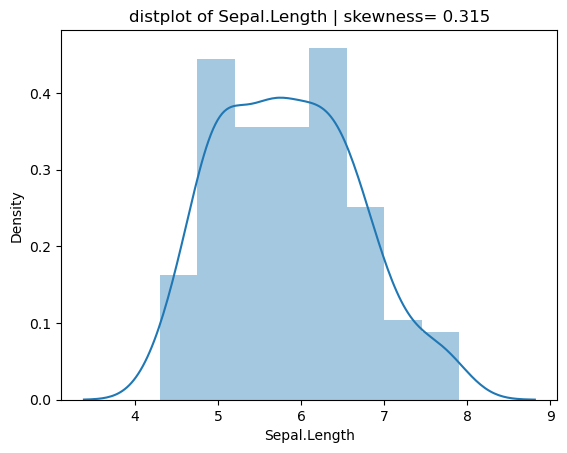

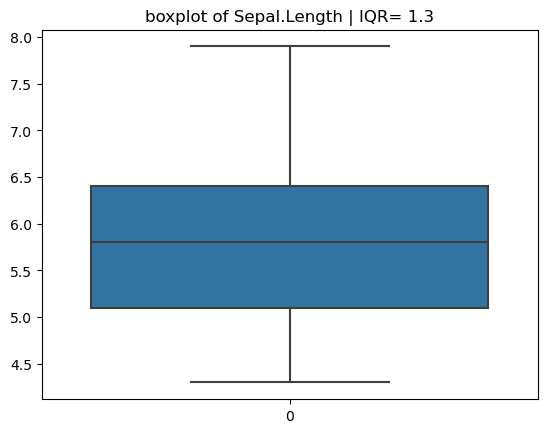

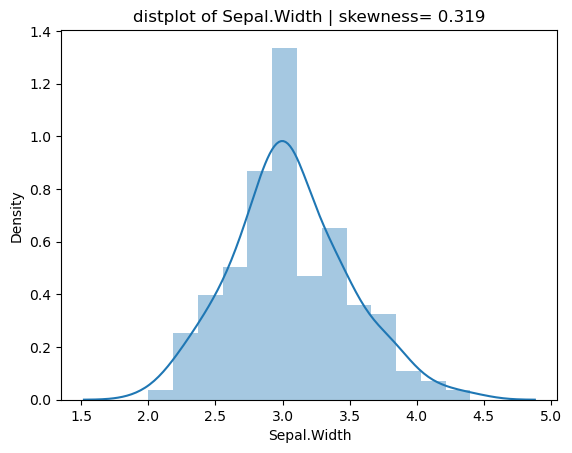

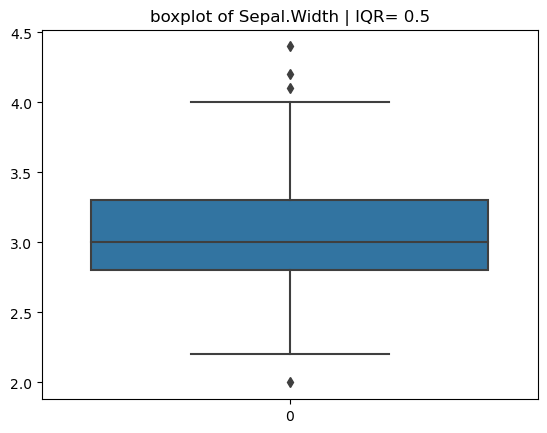

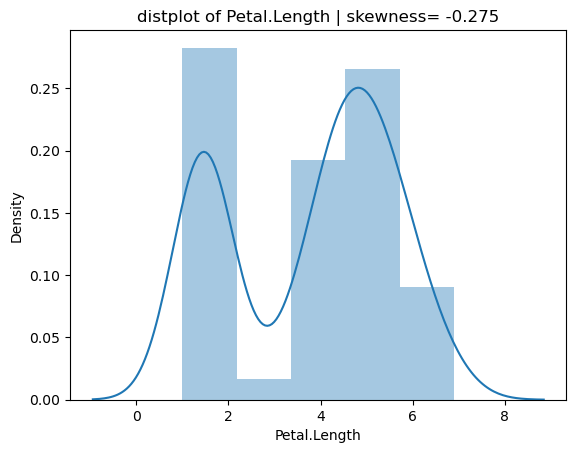

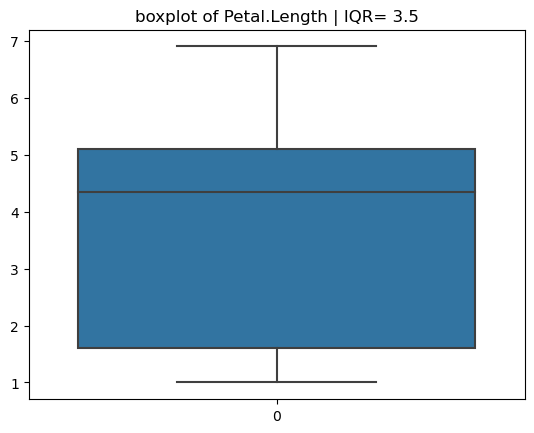

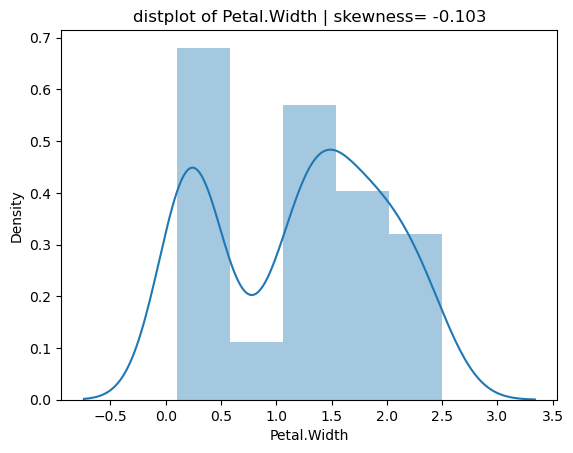

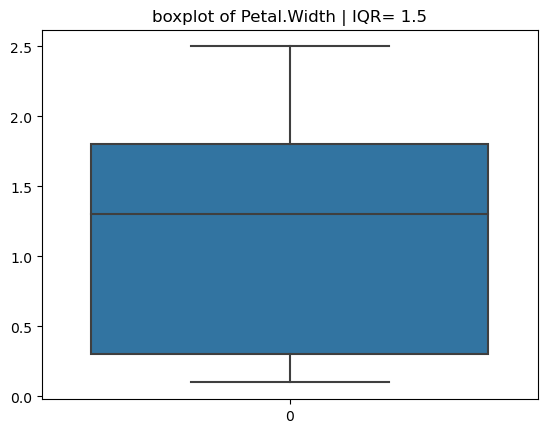

In [14]:
for i in df.select_dtypes(include=["float","integer"]):
    plt.figure()
    skewness=round(df[i].skew(),3)
    sns.distplot(df[i])
    plt.title(f"distplot of {i} | skewness= {skewness}")
    plt.figure()
    IQR= round(df[i].quantile(0.75)-df[i].quantile(0.25),3)
    sns.boxplot(df[i])
    plt.title(f"boxplot of {i} | IQR= {IQR}")

([<matplotlib.patches.Wedge at 0x20f1041d070>,
 [Text(0.5499999702695115, 0.9526279613277875, 'setosa'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'versicolor'),
  Text(0.5500001486524352, -0.9526278583383436, 'virginica')],
 [Text(0.2999999837833699, 0.5196152516333385, '33%'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '33%'),
  Text(0.30000008108314646, -0.5196151954572783, '33%')])

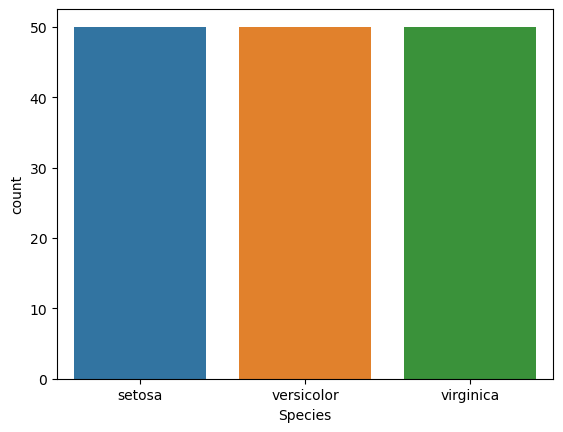

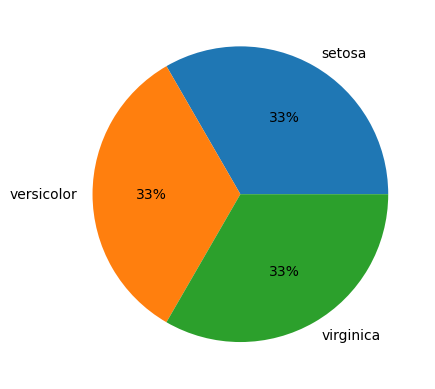

In [28]:
plt.figure()
sns.countplot(data=df, x="Species")
plt.figure()
plt.pie(df["Species"].value_counts(), labels=df["Species"].unique(),autopct="%1.f%%")

In [31]:
df["Species"]=df["Species"].replace({"setosa":0,
                                  "versicolor":1,
                                  "virginica":2})

In [32]:
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [35]:
x= df.drop("Species",axis=1)
y= df["Species"]

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,train_size=2/3, random_state=44)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train1= scaler.fit_transform(x_train)
x_test1= scaler.fit_transform(x_test)

In [41]:
from sklearn.naive_bayes import GaussianNB
nb_base= GaussianNB()
nb_base.fit(x_train1, y_train)
y_predict_nb= nb_base.predict(x_test1)

0.96
[1.         0.93333333 0.94117647]


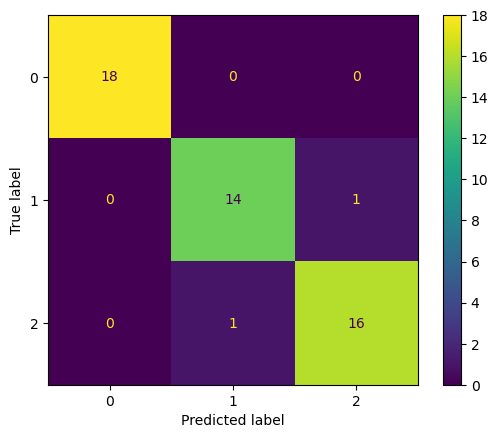

In [46]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
print(accuracy_score(y_test, y_predict_nb))
print(precision_score(y_test,y_predict_nb,average=None))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_predict_nb)).plot()

0.96
[1.         0.88235294 1.        ]


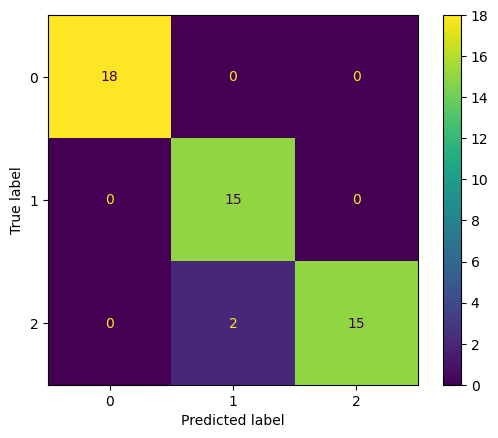

In [49]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dt_base= DecisionTreeClassifier()
dt_base.fit(x_train1, y_train)
y_predict_dt= dt_base.predict(x_test1)
print(accuracy_score(y_test,y_predict_dt))
print(precision_score(y_test,y_predict_dt,average=None))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_predict_dt)).plot()

[Text(0.3, 0.9285714285714286, 'X[2] <= -0.688\ngini = 0.666\nsamples = 100\nvalue = [32, 35, 33]'),
 Text(0.2, 0.7857142857142857, 'gini = 0.0\nsamples = 32\nvalue = [32, 0, 0]'),
 Text(0.4, 0.7857142857142857, 'X[2] <= 0.541\ngini = 0.5\nsamples = 68\nvalue = [0, 35, 33]'),
 Text(0.3, 0.6428571428571429, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(0.5, 0.6428571428571429, 'X[3] <= 0.698\ngini = 0.193\nsamples = 37\nvalue = [0, 4, 33]'),
 Text(0.2, 0.5, 'X[1] <= -1.669\ngini = 0.5\nsamples = 6\nvalue = [0, 3, 3]'),
 Text(0.1, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3, 0.35714285714285715, 'X[1] <= -0.746\ngini = 0.48\nsamples = 5\nvalue = [0, 3, 2]'),
 Text(0.2, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.4, 0.21428571428571427, 'X[2] <= 0.712\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.3, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.5, 0.07142857142857142, 'gini 

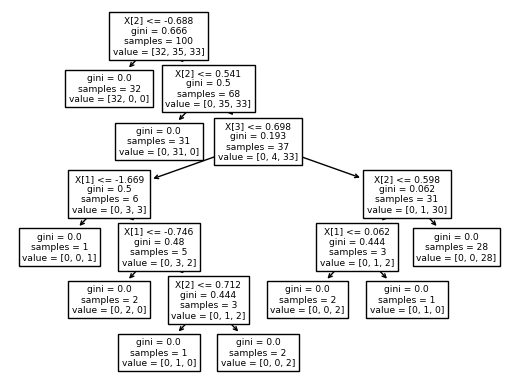

In [50]:
tree.plot_tree(dt_base)

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn_base= KNeighborsClassifier()
knn_base.fit(x_train1,y_train)
y_predict_knn = knn_base.predict(x_test1)

0.96
[1.         0.88235294 1.        ]


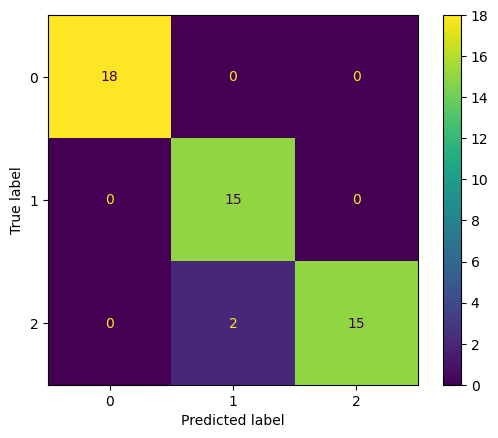

In [58]:
print(accuracy_score(y_test, y_predict_knn))
print(precision_score(y_test, y_predict_knn,average=None))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_predict_knn)).plot()

In [61]:
from sklearn.svm import LinearSVC
svc= LinearSVC()
svc.fit(x_train1,y_train)
y_predict_svc=svc.predict(x_test1)

0.94
[1.     0.875  0.9375]


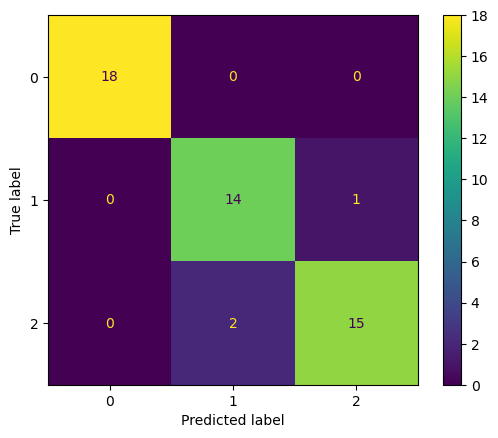

In [68]:
print(accuracy_score(y_test, y_predict_svc))
print(precision_score(y_test,y_predict_svc,average=None))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_predict_svc)).plot()

In [72]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x_train2= pca.fit_transform(x_train1)
nb_base.fit(x_train2, y_train)
knn_base.fit(x_train2, y_train)
svc.fit(x_train2, y_train)

LinearSVC()

<AxesSubplot:>

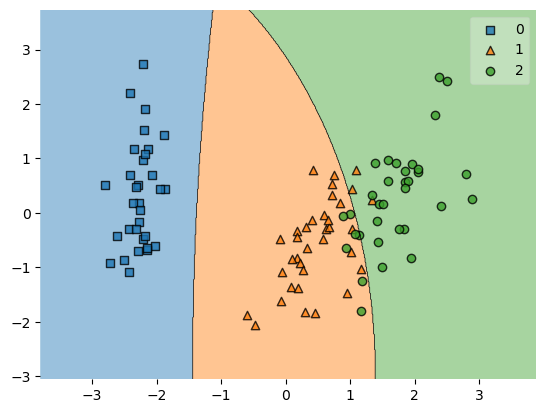

In [77]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train2, np.array(y_train), clf=nb_base, legend=1)

<AxesSubplot:>

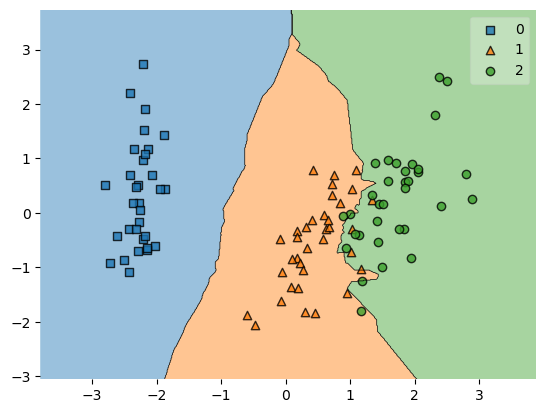

In [76]:
plot_decision_regions(x_train2, np.array(y_train),clf=knn_base, legend=1)

<AxesSubplot:>

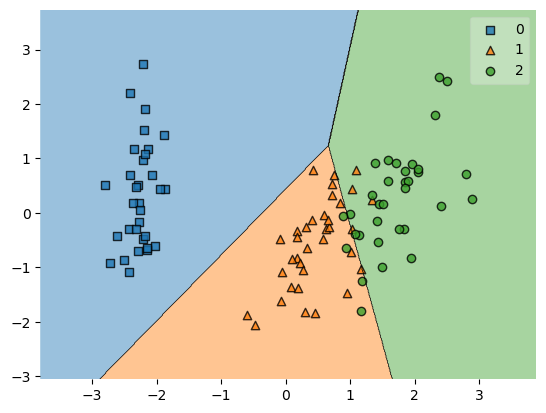

In [78]:
plot_decision_regions(x_train2, np.array(y_train),clf=svc,legend=1)